## **Задание 1.**
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью? 

**Построить точечный график**


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
water = pd.read_csv('water.csv')
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


(0.0, 3000.0)

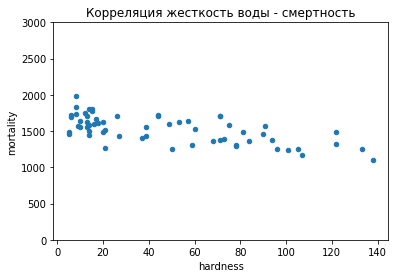

In [ ]:
water.plot(kind='scatter',             # на графике наблюдается обратная линейная заивисмость - чем меньше степень жёсткости воды, тем больше смертность
        x='hardness', 
        y='mortality', 
        title='Корреляция жесткость воды - смертность')
plt.ylim(0, 3000)

**Рассчитать коэффициенты корреляции Пирсона и Спирмена**

In [ ]:
# коэф. корреляции Пирсона - средняя обратная взаимосвязь (-0.65)
water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
# коэф. корреляции Спирмана - средняя обратная взаимосвязь (-0.63)
water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


**Построить модель линейной регрессии**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = water[['hardness']]
y = water['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LinearRegression()           # метод обучается на данных и подбирает оптимальные коэффициенты
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-3.13167087])

In [ ]:
model.intercept_

1668.9722977277095

In [ ]:
# уравнение линейной регрессии, по которому будет определяться средняя годовая смертность (чем больше жесткость воды, тем меньше средняя годовая смертность):
# y = -3.13 * x + 1668.97

In [ ]:
# прогноз тестовой выборки
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [ ]:
# сравнение прогноза с фактом
compare_water = X_test.copy()

compare_water['y_pred'] = y_pred
compare_water['y_test'] = y_test
compare_water

,hardness,y_pred,y_test
0,105,1340.146856,1247
5,10,1637.655589,1558
46,14,1625.128906,1495
31,44,1531.178779,1702
13,78,1424.701970,1307
55,20,1606.338880,1625
34,133,1252.460072,1259
49,75,1434.096982,1587
12,21,1603.207209,1519
40,6,1650.182272,1696


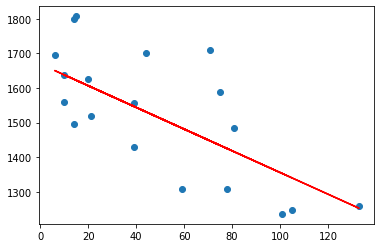

In [ ]:
# график прогнозных значений
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

**Рассчитать коэффициент детерминации**

In [ ]:
coef_det = model.score(X_test, y_test)        # оценка модели линейной регрессии
print('Коэффициент детерминации: ', coef_det)

Коэффициент детерминации:  0.5046490611017092


**Вывести график остатков**

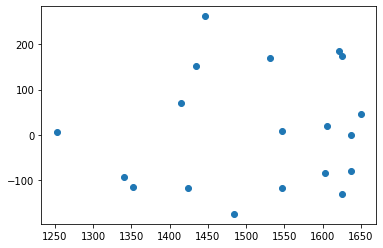

In [ ]:
# график остатков - видна хаотичность их значений, соответственно модель не ошибается, в целом зависимость смертности от жесткости воды наблюдается
plt.scatter(y_pred, (y_test - y_pred))

## **Задание 2.**
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

**Разделить данные на 2 группы**


In [ ]:
water_s = water[water['location'].isin(['South'])]
water_s.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [ ]:
water_n = water[water['location'].isin(['North'])]
water_n.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


**Построить точечный график**

(0.0, 3000.0)

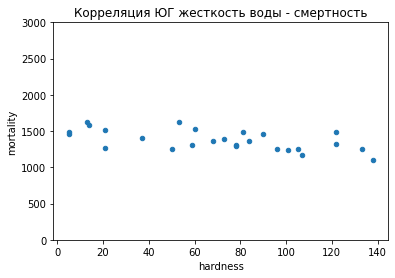

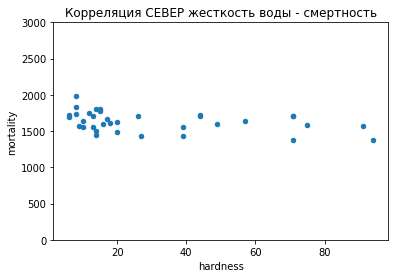

In [ ]:
water_s.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Корреляция ЮГ жесткость воды - смертность')
plt.ylim(0, 3000)
water_n.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Корреляция СЕВЕР жесткость воды - смертность')
plt.ylim(0,3000)

**Рассчитать коэффициенты корреляции Пирсона и Спирмена**

In [ ]:
# коэф. корреляции Пирсона ЮГ - средняя обратная взаимосвязь (-0.60)
water_s[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
# коэф. корреляции Пирсона СЕВЕР  - средняя обратная взаимосвязь (-0.37)
water_n[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
# коэф. корреляции Спирмана ЮГ - средняя обратная взаимосвязь (-0.59)
water_s[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
# коэф. корреляции Спирмана СЕВЕР - средняя обратная взаимосвязь (-0.40)
water_n[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


**Построить модель линейной регрессии ЮГ**

In [ ]:
X = water_s[['hardness']]
y = water_s['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LinearRegression()           # метод обучается на данных и подбирает оптимальные коэффициенты
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-3.51342921])

In [ ]:
model.intercept_

1640.2204603423374

In [ ]:
# уравнение линейной регрессии, по которому будет определяться средняя годовая смертность (чем больше жесткость воды, тем меньше средняя годовая смертность):
# y = -3.51 * x + 1640.22

In [ ]:
# прогноз тестовой выборки
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [ ]:
# сравнение прогноза с фактом
compare_water_s = X_test.copy()

compare_water_s['y_pred'] = y_pred
compare_water_s['y_test'] = y_test
compare_water_s

,hardness,y_pred,y_test
18,122,1211.582096,1318
38,5,1622.653314,1486
0,105,1271.310393,1247
58,122,1211.582096,1486
27,37,1510.223579,1402
19,21,1566.438447,1260
33,59,1432.928137,1309
2,5,1622.653314,1466


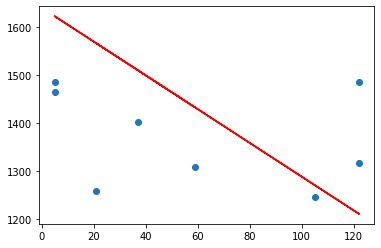

In [ ]:
# график прогнозных значений
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

**Построить модель линейной регрессии СЕВЕР**

In [ ]:
X = water_n[['hardness']]
y = water_n['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LinearRegression()           # метод обучается на данных и подбирает оптимальные коэффициенты
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-1.97686226])

In [ ]:
model.intercept_

1688.150229031281

In [ ]:
# уравнение линейной регрессии, по которому будет определяться средняя годовая смертность (чем больше жесткость воды, тем меньше средняя годовая смертность):
# y = -1.97 * x + 1688.15

In [ ]:
# прогноз тестовой выборки
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [ ]:
# сравнение прогноза с фактом
compare_water_n = X_test.copy()

compare_water_n['y_pred'] = y_pred
compare_water_n['y_test'] = y_test
compare_water_n

,hardness,y_pred,y_test
45,8,1672.335331,1987
23,9,1670.358469,1574
43,14,1660.474157,1444
36,6,1676.289055,1724
26,16,1656.520433,1591
50,71,1547.793009,1713
31,44,1601.168290,1702
22,8,1672.335331,1742
16,39,1611.052601,1555
28,15,1658.497295,1772


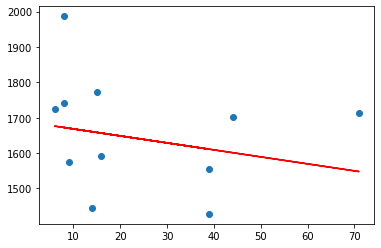

In [ ]:
# график прогнозных значений - связь менее выражена
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

**Рассчитать коэффициент детерминации**

In [ ]:
coef_det_s = model.score(X_test, y_test)        # оценка модели линейной регрессии
print('Коэффициент детерминации ЮГ: ', coef_det_s)

Коэффициент детерминации ЮГ:  -2.5519223012352077


In [ ]:
coef_det_n = model.score(X_test, y_test)        # оценка модели линейной регрессии
print('Коэффициент детерминации СЕВЕР: ', coef_det_n)


Коэффициент детерминации СЕВЕР:  0.018885304285745863


In [ ]:
# значения коэфф-в детерминации стали менее 0.5 , соответственно и качество моделей ухудшилось

**Вывести график остатков**

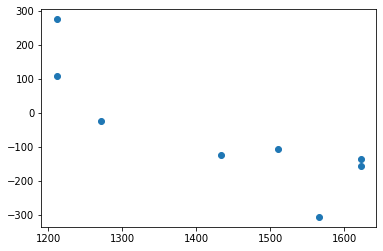

In [ ]:
# график остатков ЮГ - видна хаотичность их значений
plt.scatter(y_pred, (y_test - y_pred))

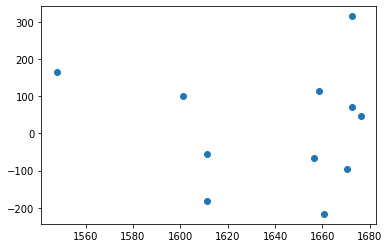

In [ ]:
# график остатков СЕВЕР - видна хаотичность их значений, соответственно модель не ошибается, в целом зависимость смертности от жесткости воды наблюдается
plt.scatter(y_pred, (y_test - y_pred))